# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 2: Data Inspection, Cleaning and Wrangling in Python

Mark Bauer

Table of Contents
=================

   * Getting Started
       
       
   * 1. Importing Libraries

       
   * 2. Reading in Data as a pandas Dataframe
       
   
   * 3. Data Inspection
       * 3.1 Previewing Data
       * 3.2 Calculating Summary Statistics
       * 3.3 Identifying Null Values
       
       
   * 4. Data Cleaning & Wrangling
       * 4.1 Previewing Column Values
       * 4.2 Exploring Distribution of Values
       * 4.3 Making a Box Plot
       * 4.4 Calculating Interquartile Range (IQR)
       * 4.5 Dropping Null Values
       * 4.6 Replacing Null Values
       
       
   * 5. Analysis
       * 5.1. Timeseries of Year Built
       * 5.2. Attempting to Identify the Oldest Building in NYC
       
       
   * 6. Conclusion

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset

## Reading in data as CSV in static form

Copy this link address shown below:

![building_footprints_csv](images/building-footprints-csv.png)

### Dataset Web Page Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

### Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

### Attribute Information:
---------------------------------------------
| Attribute | Description | Field Type | Sensitive Field (Y/N) | Notes| 
|------------ | ------------- | -------- | ----------- | ----------|
| BASE_BBL | Borough, block, and lot number for the tax lot that the footprint is physically located within. | text | No
| MPLUTO_BBL | Borough, block, and lot number to be used for joining the building footprints data to DCP's MapPLUTO data, which aggregates data for condominium buildings using DOF's billing BBL. For non-condominium buildings the billing BBL is the same as the BASE_BBL. For condominium buildings the billing BBL may be the same for multiple buildings on different physical tax lots if they are part of the same billing unit for DOF purposes. | text | No
| BIN | Building Identification Number. A number assigned by City Planning and used by Dept. of Buildings to reference information pertaining to an individual building. The first digit is a borough code (1 = Manhattan, 2 = The Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island). The remaining 6 digits are unique for buildings within that borough. In some cases where these 6 digits are all zeros (e.g. 1000000, 2000000, etc.) the BIN is unassigned or unknown. | double | No
| NAME | Building name (limited to commonly known names). This field has not been actively maintained since the original creation of this dataset. | text | No
| LSTMODDATE | Feature last modified date | date | No
| LSTSTATTYPE | Feature last status type (Demolition, Alteration, Geometry, Initialization, Correction, Marked for Construction, Marked For Demolition, Constructed) | text | No
| CNSTRCT_YR | The year construction of the building was completed. <br>Originally this column was populated using the Department of Finance Real Property Assessment Database (RPAD). Beginning in 2017 this will be the first year the completed structure is visible in available orthoimagery. Records where this is zero or NULL mean that this information was not available. | double | No
| DOITT_ID | Unique identifier assigned by DOITT.  | double | No
| HEIGHTROOF | Building Height is calculated as the difference from the building elevation from the Elevation point feature class and the elevation in the interpolated TIN model. This is the height of the roof above the ground elevation, NOT its height above sea level. Records where this is zero or NULL mean that this information was not available. | double | No | The units of measurement are based on the coordinate reference system used, which for all Planimetrics is New York State Plane Coordinates, Long Island East Zone, NAD83, US foot. All measurements in the attribute tables are in US foot. The building height information is updated through our planimetric updates every 4 years. In between those 4-year update cycles, DoITT manually updates building height information from a variety of sources -- (1) Final as-built heights as shown in plan drawings posted on Department of Buildings BIS website (2) EagleView Oblique imagery, direct measurements taken on photogrammetrically controlled aerial imagery (3) Cyclomedia imagery, direct measurements were taken on photogrammetrically controlled terrestrial imagery (for buildings less than 60’ tall, only)
| FEAT_CODE | Type of Building. List of values:<br>2100 = Building<br>5100 = Building Under Construction<br>5110 = Garage<br>2110 = Skybridge<br>1001 = Gas Station Canopy<br>1002 = Storage Tank<br>1003 = Placeholder (triangle for permitted bldg)<br>1004 = Auxiliary Structure (non-addressable, not garage)<br>1005 = Temporary Structure (e.g. construction trailer) | long | No
| GROUNDELEV | Lowest Elevation at the building ground level. Calculated from LiDAR or photogrammetrically. | double | No | The units of measurement are based on the coordinate reference system used, which for all Planimetrics is New York State Plane Coordinates, Long Island East Zone, NAD83, US foot. All measurements in the attribute tables are in US foot.
| GEOM_SOURCE | Indicates the reference source used to add or update the feature. Photogrammetric means the feature was added or updated using photogrammetric stereo-compilation methodology. This is the most accurate update method and should conform to the ASPRS accuracy standards. Other (Manual) means the feature was added or updated by heads-up digitizing from orthophotos or approximated from a plan drawing. These features will be generally be less accurate and may not conform to the ASPRS accuracy standards. | text | No

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# to plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
# Printing verions of Python modules and packages with **watermark** 

%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib.pyplot

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy            : 1.23.1
pandas           : 1.4.3
matplotlib.pyplot: unknown



Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Reading in Data as a pandas Dataframe

If you receive `HTTPError: HTTP Error 404: Not Found`, you need to replace the CSV link. DoITT changes the link path regularly.

In [3]:
# assigning the link of our data (a static csv file) as the name 'url'
# reading in our data as a pandas dataframe called building_df
url = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'
building_df = pd.read_csv(url)

# preview the data
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3.065220e+09,3.065220e+09,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5.012640e+09,5.012640e+09,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5.060190e+09,5.060190e+09,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3.086910e+09,3.086910e+09,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4.075020e+09,4.075020e+09,Photogramm


# 3. Data Inspection

## 3.1 Previewing Data

In [4]:
# previewing the first five rows
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3.065220e+09,3.065220e+09,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5.012640e+09,5.012640e+09,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5.060190e+09,5.060190e+09,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3.086910e+09,3.086910e+09,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4.075020e+09,4.075020e+09,Photogramm


In [5]:
# previewing the last five rows
building_df.tail()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1084574,MULTIPOLYGON (((-74.15408285600527 40.61843529...,NaN,5170853,1986.0,08/06/2018 12:00:00 AM,Constructed,1285965,25.0,2100.0,35.0,0,0,5.014951e+09,5.014958e+09,Other (Man
1084575,MULTIPOLYGON (((-74.15413053323984 40.61907034...,NaN,5110805,1986.0,08/06/2018 12:00:00 AM,Constructed,1285973,26.0,2100.0,37.0,0,0,5.014951e+09,5.014958e+09,Other (Man
1084576,MULTIPOLYGON (((-74.15319319425097 40.61894320...,NaN,5170867,1986.0,08/06/2018 12:00:00 AM,Constructed,1285980,24.0,2100.0,36.0,0,0,5.014951e+09,5.014958e+09,Other (Man
1084577,MULTIPOLYGON (((-74.15321747767516 40.61931962...,NaN,5170871,1986.0,08/06/2018 12:00:00 AM,Constructed,1285985,25.0,2100.0,36.0,0,0,5.014951e+09,5.014958e+09,Other (Man
1084578,MULTIPOLYGON (((-74.15269472025933 40.61944964...,NaN,5170878,1986.0,08/06/2018 12:00:00 AM,Constructed,1285990,24.0,2100.0,37.0,0,0,5.014951e+09,5.014958e+09,Other (Man


In [6]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_df.shape

(1084579, 15)

In [7]:
# more readable
rows, columns = building_df.shape

print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,084,579 rows and 15 columns.


In [8]:
# the object's type
type(building_df)

pandas.core.frame.DataFrame

In [9]:
# printing the columns
building_df.columns

Index(['the_geom', 'NAME', 'BIN', 'CNSTRCT_YR', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE'],
      dtype='object')

In [10]:
# printing the columns of our dataframe in new line
for col in building_df.columns:
    print(col)

the_geom
NAME
BIN
CNSTRCT_YR
LSTMODDATE
LSTSTATYPE
DOITT_ID
HEIGHTROOF
FEAT_CODE
GROUNDELEV
SHAPE_AREA
SHAPE_LEN
BASE_BBL
MPLUTO_BBL
GEOMSOURCE


In [11]:
# printing the data types of our columns
building_df.dtypes

the_geom       object
NAME           object
BIN             int64
CNSTRCT_YR    float64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA      int64
SHAPE_LEN       int64
BASE_BBL      float64
MPLUTO_BBL    float64
GEOMSOURCE     object
dtype: object

In [12]:
# printing the column names, non-null counts,
# and datatypes of our columns
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084579 entries, 0 to 1084578
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1084579 non-null  object 
 1   NAME        1937 non-null     object 
 2   BIN         1084579 non-null  int64  
 3   CNSTRCT_YR  1073752 non-null  float64
 4   LSTMODDATE  1084579 non-null  object 
 5   LSTSTATYPE  1084321 non-null  object 
 6   DOITT_ID    1084579 non-null  int64  
 7   HEIGHTROOF  1081895 non-null  float64
 8   FEAT_CODE   1084572 non-null  float64
 9   GROUNDELEV  1084032 non-null  float64
 10  SHAPE_AREA  1084579 non-null  int64  
 11  SHAPE_LEN   1084579 non-null  int64  
 12  BASE_BBL    1084575 non-null  float64
 13  MPLUTO_BBL  1081868 non-null  float64
 14  GEOMSOURCE  1084345 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 124.1+ MB


In [13]:
# counts of values of our datatypes 
building_df.dtypes.value_counts()

float64    6
object     5
int64      4
dtype: int64

In [14]:
# printing index type
building_df.index

RangeIndex(start=0, stop=1084579, step=1)

In [15]:
# printing True/False if column is unique on our unique key (DOITT_ID)
unique = building_df['DOITT_ID'].is_unique

print('our unique id is truly unique: {}'.format(unique))

our unique id is truly unique: False


In [16]:
# transpose index and columns of first five rows
building_df.head().T

,0,1,2,3,4
the_geom,MULTIPOLYGON (((-73.96664570466969 40.62599676...,MULTIPOLYGON (((-74.16790202462265 40.63936048...,MULTIPOLYGON (((-74.19510813278613 40.55610681...,MULTIPOLYGON (((-73.96113466505085 40.57743931...,MULTIPOLYGON (((-73.75421559146166 40.75591276...
NAME,NaN,NaN,NaN,NaN,NaN
BIN,3170958,5028452,5078368,3245111,4161096
CNSTRCT_YR,1925.0,1965.0,1970.0,1928.0,1950.0
LSTMODDATE,08/22/2017 12:00:00 AM,08/22/2017 12:00:00 AM,08/22/2017 12:00:00 AM,08/22/2017 12:00:00 AM,08/22/2017 12:00:00 AM
LSTSTATYPE,Constructed,Constructed,Constructed,Constructed,Constructed
DOITT_ID,96807,326368,746627,786626,746409
HEIGHTROOF,29.749853,22.63,35.76,37.5,18.015113
FEAT_CODE,2100.0,2100.0,2100.0,2100.0,2100.0
GROUNDELEV,40.0,39.0,51.0,6.0,93.0


## 3.2 Calculating Summary Statistics

In [17]:
# printing descriptive statistics of our numeric columns
building_df.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.084579e+06,1.073752e+06,1.084579e+06,1.081895e+06,1.084572e+06,1.084032e+06,1084579.0,1084579.0,1.084575e+06,1.081868e+06
mean,3.711580e+06,1.939330e+03,5.930551e+05,2.761217e+01,2.697230e+03,5.510150e+01,0.0,0.0,3.562996e+09,3.562587e+09
std,1.026837e+06,2.914270e+01,3.608023e+05,2.154364e+01,1.201382e+03,4.152162e+01,0.0,0.0,9.861452e+08,9.857237e+08
min,1.000002e+06,1.652000e+03,1.000000e+00,0.000000e+00,0.000000e+00,-1.600000e+01,0.0,0.0,1.090961e+06,3.064269e+06
25%,3.129120e+06,1.920000e+03,2.874075e+05,1.841000e+01,2.100000e+03,2.500000e+01,0.0,0.0,3.043260e+09,3.043270e+09
50%,4.067369e+06,1.930000e+03,5.749590e+05,2.610000e+01,2.100000e+03,4.600000e+01,0.0,0.0,4.019430e+09,4.019400e+09
75%,4.482780e+06,1.955000e+03,8.642395e+05,3.110000e+01,2.100000e+03,7.400000e+01,0.0,0.0,4.106860e+09,4.106730e+09
max,5.799523e+06,2.022000e+03,1.297550e+06,1.550000e+03,5.110000e+03,5.560000e+02,0.0,0.0,6.000000e+09,6.000000e+09


In [18]:
# printing descriptive statistics of our non-numeric columns
building_df.describe(include=['O'])

,the_geom,NAME,LSTMODDATE,LSTSTATYPE,GEOMSOURCE
count,1084579,1937,1084579,1084321,1084345
unique,1084579,1564,1386,12,3
top,MULTIPOLYGON (((-73.96664570466969 40.62599676...,Adler Place Town Houses,08/22/2017 12:00:00 AM,Constructed,Photogramm
freq,1,52,804442,1082202,1016451


In [19]:
# returning the mode of our numeric columns (excluding our unique key = 'DOITT_ID')
mode_df = building_df.drop(columns=['DOITT_ID'])

# getting the mode of each numeric column
mode = mode_df.mode(numeric_only=True)

# renaming index to 'mode'
mode = mode.rename(index={0: "mode"})

mode

,BIN,CNSTRCT_YR,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
mode,3000000,1920.0,30.0,2100.0,10.0,0,0,4.163500e+09,4.163500e+09


In [20]:
# compute pairwise correlation of columns, excluding NA/null values
building_df.corr()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
BIN,1.000000,0.293091,0.156252,-0.358951,0.190366,0.086760,NaN,NaN,0.988555,0.988693
CNSTRCT_YR,0.293091,1.000000,0.189700,0.015941,-0.131369,-0.002766,NaN,NaN,0.287740,0.289493
DOITT_ID,0.156252,0.189700,1.000000,-0.169200,0.546314,-0.017089,NaN,NaN,0.075784,0.075447
HEIGHTROOF,-0.358951,0.015941,-0.169200,1.000000,-0.362731,-0.001677,NaN,NaN,-0.328772,-0.329597
FEAT_CODE,0.190366,-0.131369,0.546314,-0.362731,1.000000,0.001300,NaN,NaN,0.089522,0.089726
GROUNDELEV,0.086760,-0.002766,-0.017089,-0.001677,0.001300,1.000000,NaN,NaN,0.105859,0.106264
SHAPE_AREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHAPE_LEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASE_BBL,0.988555,0.287740,0.075784,-0.328772,0.089522,0.105859,NaN,NaN,1.000000,0.999993
MPLUTO_BBL,0.988693,0.289493,0.075447,-0.329597,0.089726,0.106264,NaN,NaN,0.999993,1.000000


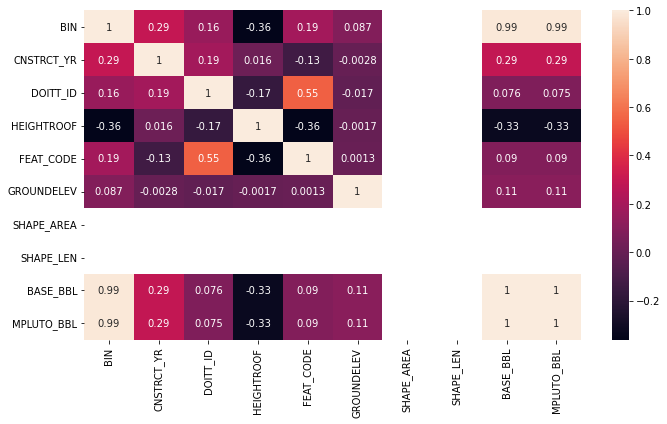

In [21]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(building_df.corr(), 
            annot=True, 
            ax=ax)

plt.tight_layout()

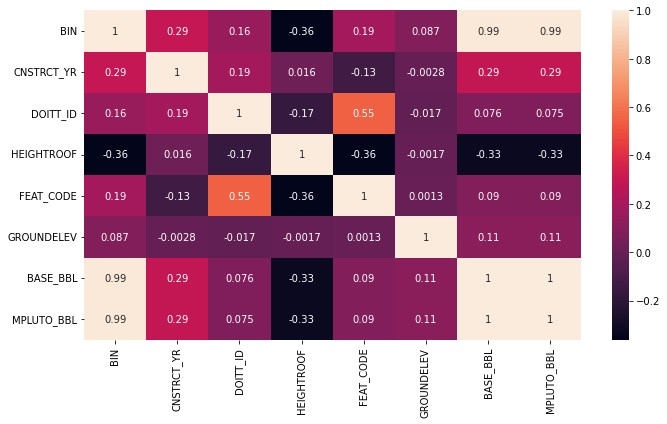

In [22]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10,6))

# dropping columns of all nulls
corr_df = building_df.drop(columns=['SHAPE_AREA', 'SHAPE_LEN'])

sns.heatmap(corr_df.corr(), 
            annot=True, 
            ax=ax)

plt.tight_layout()

## 3.3 Identifying Null/NA Values

In [23]:
# nulls per column
building_df.isnull().sum()

the_geom            0
NAME          1082642
BIN                 0
CNSTRCT_YR      10827
LSTMODDATE          0
LSTSTATYPE        258
DOITT_ID            0
HEIGHTROOF       2684
FEAT_CODE           7
GROUNDELEV        547
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            4
MPLUTO_BBL       2711
GEOMSOURCE        234
dtype: int64

In [24]:
# total nulls in dataframe
null_count = building_df.isnull().sum().sum()

print('total nulls in dataframe: {:,}'.format(null_count))

total nulls in dataframe: 1,099,914


In [25]:
# return a boolean same-sized object of nulls
building_df.isnull()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084574,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1084575,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1084576,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1084577,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
# return a boolean if any of the values are null in column
building_df.isnull().any()

the_geom      False
NAME           True
BIN           False
CNSTRCT_YR     True
LSTMODDATE    False
LSTSTATYPE     True
DOITT_ID      False
HEIGHTROOF     True
FEAT_CODE      True
GROUNDELEV     True
SHAPE_AREA    False
SHAPE_LEN     False
BASE_BBL       True
MPLUTO_BBL     True
GEOMSOURCE     True
dtype: bool

In [27]:
null_cols_ser = building_df.isnull().any()

# locating columns by boolean 'True'
null_cols = null_cols_ser.loc[null_cols_ser].index

print('these columns have at least one null value:\n')
for col in null_cols:
    print(col)

these columns have at least one null value:

NAME
CNSTRCT_YR
LSTSTATYPE
HEIGHTROOF
FEAT_CODE
GROUNDELEV
BASE_BBL
MPLUTO_BBL
GEOMSOURCE


In [28]:
# calculating a percentage of the number of nulls to total number of records of each column
missing_data = (building_df.isnull().sum() / len(building_df)) * 100

# creating a dataframe
missing_data = pd.DataFrame(missing_data, columns=['perc_missing']) 
missing_data = missing_data.sort_values(by='perc_missing', ascending=False)

missing_data

,perc_missing
NAME,99.821405
CNSTRCT_YR,0.998268
MPLUTO_BBL,0.249959
HEIGHTROOF,0.247469
GROUNDELEV,0.050434
LSTSTATYPE,0.023788
GEOMSOURCE,0.021575
FEAT_CODE,0.000645
BASE_BBL,0.000369
the_geom,0.000000


# 4. Data Cleaning & Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## Attribute Information for CNSTRCT_YR:
---------------------------------------------
| Attribute | Description | Field Type | Sensitive Field (Y/N) | Notes| 
|------------ | ------------- | -------- | ----------- | ----------|
| CNSTRCT_YR | The year construction of the building was completed. <br>Originally this column was populated using the Department of Finance Real Property Assessment Database (RPAD). Beginning in 2017 this will be the first year the completed structure is visible in available orthoimagery. Records where this is zero or NULL mean that this information was not available. | double | No

## 4.1 Previewing Column Values

In [29]:
# printing the object's type of a column
type(building_df['CNSTRCT_YR'])

pandas.core.series.Series

In [30]:
# notice the difference of type from dataframe to series
print(type(building_df["CNSTRCT_YR"]))
print(type(building_df[["CNSTRCT_YR"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [31]:
# returning a series of the 'CNSTRCT_YR' column
building_df["CNSTRCT_YR"]

0          1925.0
1          1965.0
2          1970.0
3          1928.0
4          1950.0
            ...  
1084574    1986.0
1084575    1986.0
1084576    1986.0
1084577    1986.0
1084578    1986.0
Name: CNSTRCT_YR, Length: 1084579, dtype: float64

In [32]:
# returning a dataframe of the 'CNSTRCT_YR' column double brackets
building_df[["CNSTRCT_YR"]]

,CNSTRCT_YR
0,1925.0
1,1965.0
2,1970.0
3,1928.0
4,1950.0
...,...
1084574,1986.0
1084575,1986.0
1084576,1986.0
1084577,1986.0


In [33]:
# first five rows sorted by the 'CNSTRCT_YR' column in ascending order
building_df.sort_values('CNSTRCT_YR').head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1044341,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.540000,2100.0,14.0,0,0,3.079170e+09,3.079170e+09,Photogramm
776301,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.120000,2100.0,64.0,0,0,4.050130e+09,4.050130e+09,Photogramm
470946,MULTIPOLYGON (((-73.82449114078894 40.76279389...,NaN,4610542,1661.0,08/17/2017 12:00:00 AM,Constructed,1190137,14.846959,5110.0,63.0,0,0,4.050130e+09,4.050130e+09,Photogramm
57665,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.640000,2100.0,38.0,0,0,5.078570e+09,5.078570e+09,Photogramm
570083,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.260000,2100.0,21.0,0,0,5.028300e+09,5.028300e+09,Photogramm


In [34]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
building_df.sort_values('CNSTRCT_YR', ascending=False).head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1071842,MULTIPOLYGON (((-73.88423073632094 40.83387119...,NaN,2129122,2022.0,04/05/2022 12:00:00 AM,Constructed,1296731,70.0,5100.0,26.0,0,0,2.030140e+09,NaN,Other (Man
1079981,MULTIPOLYGON (((-74.16842117082207 40.62881498...,NaN,5169470,2022.0,03/29/2022 12:00:00 AM,Constructed,1296696,30.0,2100.0,15.0,0,0,5.012700e+09,NaN,Other (Man
1083231,MULTIPOLYGON (((-73.75281001556777 40.60670737...,NaN,4620755,2022.0,07/08/2022 12:00:00 AM,Initialization,1297376,NaN,1003.0,NaN,0,0,4.155370e+09,NaN,Other (Man
1073348,MULTIPOLYGON (((-73.94327636260768 40.68293549...,NaN,3338719,2022.0,01/06/2022 12:00:00 AM,Initialization,1296255,80.0,5100.0,48.0,0,0,3.018400e+09,NaN,Other (Man
1083232,MULTIPOLYGON (((-73.75326919826644 40.60548656...,NaN,4458300,2022.0,07/08/2022 12:00:00 AM,Constructed,1297378,155.0,2100.0,24.0,0,0,4.155370e+09,NaN,Other (Man


In [35]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset's distribution, excluding ``NaN`` values.
# reset index for readability.

df = building_df['CNSTRCT_YR'].describe().reset_index()
df = df.rename(columns={'index': "statistic"})

df

,statistic,CNSTRCT_YR
0,count,1.073752e+06
1,mean,1.939330e+03
2,std,2.914270e+01
3,min,1.652000e+03
4,25%,1.920000e+03
5,50%,1.930000e+03
6,75%,1.955000e+03
7,max,2.022000e+03


In [36]:
# printing the mode of our 'CNSTRCT_YR' column
mode = building_df[['CNSTRCT_YR']].mode()
mode = mode.rename({0: "mode"})

mode

,CNSTRCT_YR
mode,1920.0


In [37]:
# detecting any nulls in our 'CNSTRCT_YR' column
building_df['CNSTRCT_YR'].isnull().values.any()

True

In [38]:
# summing all the null values in our 'CNSTRCT_YR' column
building_df['CNSTRCT_YR'].isnull().sum()

10827

In [39]:
# summing all the not null values in our 'CNSTRCT_YR' column
building_df['CNSTRCT_YR'].notnull().sum()

1073752

In [40]:
# printing the percent total of all the null values in our 'CNSTRCT_YR' column.
nulls_sum = building_df['CNSTRCT_YR'].isna().sum() 
nulls_perc = round(nulls_sum / len(building_df) * 100, 2)

print('percent nulls: {}%'.format(nulls_perc))

percent nulls: 1.0%


In [41]:
# printing the percent total of all the not null values in our 'CNSTRCT_YR' column.
nonnulls_sum = building_df['CNSTRCT_YR'].notnull().sum() 
nonnulls_perc = round(nonnulls_sum / len(building_df) * 100, 2)

print('percent nulls: {}%'.format(nonnulls_perc))

percent nulls: 99.0%


## 4.2 Exploring Distribution of Values

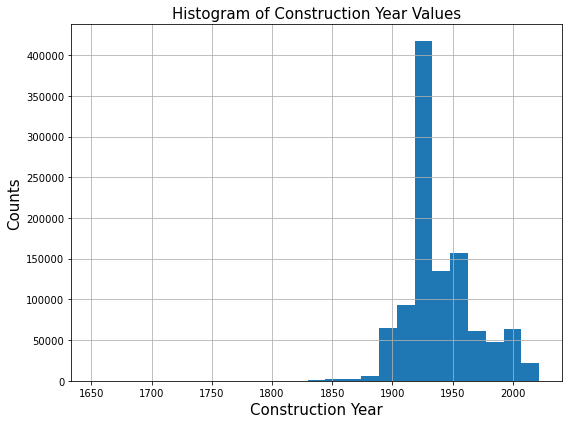

In [42]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
building_df['CNSTRCT_YR'].hist(figsize=(8, 6), bins=25)

# adding labels
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15) 
plt.title('Histogram of Construction Year Values', fontsize=15) 

plt.tight_layout()

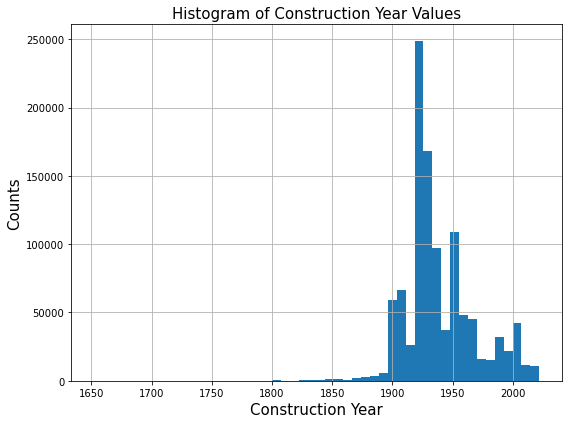

In [43]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
building_df['CNSTRCT_YR'].hist(figsize=(8, 6), bins=50)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of Construction Year Values', fontsize=15)

plt.tight_layout()

In [44]:
# printing skewness and kurtosis
print("Skewness: {:.3f}".format(building_df['CNSTRCT_YR'].skew()))
print("Kurtosis: {:.3f}".format(building_df['CNSTRCT_YR'].kurt()))

Skewness: 0.658
Kurtosis: 0.668


In [45]:
# prints the counts of values in our 'CNSTRCT_YR' column in descending order
building_df['CNSTRCT_YR'].value_counts()

1920.0    130738
1930.0    112958
1925.0    109403
1950.0     62818
1910.0     52563
           ...  
1789.0         1
1690.0         1
1680.0         1
1719.0         1
1792.0         1
Name: CNSTRCT_YR, Length: 249, dtype: int64

In [46]:
# counts of values sorted by the index (in this case, year) ascending order
building_df['CNSTRCT_YR'].value_counts().sort_index()

1652.0       1
1661.0       2
1680.0       1
1690.0       1
1694.0       1
          ... 
2018.0    2130
2019.0    1100
2020.0    1391
2021.0    1230
2022.0     235
Name: CNSTRCT_YR, Length: 249, dtype: int64

In [47]:
# value counts of the first ten rows sorted by the index ascending order
building_df['CNSTRCT_YR'].value_counts().sort_index(ascending=True).head(10)

1652.0    1
1661.0    2
1680.0    1
1690.0    1
1694.0    1
1706.0    2
1719.0    1
1720.0    1
1722.0    1
1725.0    1
Name: CNSTRCT_YR, dtype: int64

In [48]:
# value counts of the first ten rows sorted by the index descending order
building_df['CNSTRCT_YR'].value_counts().sort_index(ascending=False).head(10)

2022.0     235
2021.0    1230
2020.0    1391
2019.0    1100
2018.0    2130
2017.0    1922
2016.0    1802
2015.0    1082
2014.0     851
2013.0     904
Name: CNSTRCT_YR, dtype: int64

## 4.3 Making a Box Plot

In [49]:
# previewing the first five rows
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3.065220e+09,3.065220e+09,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5.012640e+09,5.012640e+09,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5.060190e+09,5.060190e+09,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3.086910e+09,3.086910e+09,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4.075020e+09,4.075020e+09,Photogramm


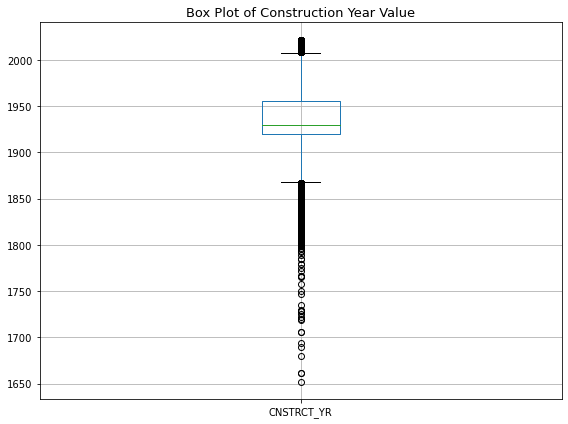

In [50]:
# making a box plot from our 'CNSTRCT_YR' column
building_df.boxplot(column=['CNSTRCT_YR'], figsize=(8,6))
plt.title('Box Plot of Construction Year Value', fontsize=13)

plt.tight_layout()

## 4.4 Calculating Interquartile Range (IQR)

In [51]:
# printing the 25% and 75% quantiles of our 'CNSTRCT_YR' column
print(building_df['CNSTRCT_YR'].quantile(0.25))
print(building_df['CNSTRCT_YR'].quantile(0.75))

1920.0
1955.0


In [52]:
# saving the 25% (i.e. Q1) and 75% (i.e. Q3) quantiles of our 'CNSTRCT_YR' column
Q1 = building_df['CNSTRCT_YR'].quantile(0.25)
Q3 = building_df['CNSTRCT_YR'].quantile(0.75)

# Computing the interquartile range (IQR)
IQR = Q3 - Q1

# printing the IQR of our 'CNSTRCT_YR' column
IQR

35.0

In [53]:
# printing the lower 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q1 - 1.5 * IQR))

# printing the upper 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q3 + 1.5 * IQR))

1867.5
2007.5


## 4.5 Dropping Null Values for CNSTRCT_YR

In [54]:
# print number of rows
len(building_df)

1084579

In [55]:
# drop nan in 'CNSTRCT_YR' and then print number of rows 
len(building_df.dropna(subset=['CNSTRCT_YR']))

1073752

In [56]:
# print number of dropped records where 'CNSTRCT_YR' is nan 
building_df['CNSTRCT_YR'].isnull().sum()

10827

In [57]:
# dropping all records where 'CNSTRCT_YR' as nan
building_df_dropna = building_df.dropna(subset=['CNSTRCT_YR'])

# printing number of records
print(len(building_df_dropna))

1073752


In [58]:
counts = building_df_dropna['CNSTRCT_YR'].isnull().sum()

print('number of nulls for CNSTRCT_YR after dropping nulls: {}'.format(counts))

number of nulls for CNSTRCT_YR after dropping nulls: 0


In [59]:
# preview first five rows
building_df_dropna.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3.065220e+09,3.065220e+09,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5.012640e+09,5.012640e+09,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5.060190e+09,5.060190e+09,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3.086910e+09,3.086910e+09,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4.075020e+09,4.075020e+09,Photogramm


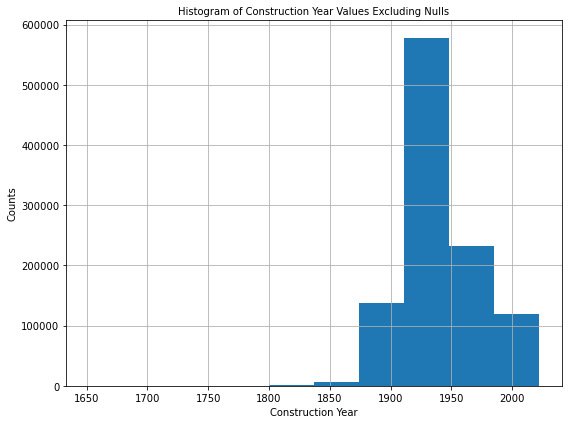

In [60]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_df_dropna['CNSTRCT_YR'].hist(bins=10, figsize=(8, 6))

plt.xlabel('Construction Year', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Histogram of Construction Year Values Excluding Nulls', fontsize=10)

plt.tight_layout()

## 4.6 Filling In Null/NA Values With Median for CNSTRCT_YR

In [61]:
# preview first five rows
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3.065220e+09,3.065220e+09,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5.012640e+09,5.012640e+09,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5.060190e+09,5.060190e+09,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3.086910e+09,3.086910e+09,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4.075020e+09,4.075020e+09,Photogramm


In [62]:
# saving a new dataframe to fill nans with the median value of 'CNSTRCT_YR'
building_df_fillna = building_df.copy()

counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()
print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 10,827


In [63]:
median = building_df_fillna['CNSTRCT_YR'].median()

print('median value of CNSTRCT_YR: {}'.format(median))

median value of CNSTRCT_YR: 1930.0


In [64]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_df_fillna['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_df_fillna["CNSTRCT_YR"] = building_df_fillna["CNSTRCT_YR"].fillna(value=median)
building_df_fillna.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3.065220e+09,3.065220e+09,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5.012640e+09,5.012640e+09,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5.060190e+09,5.060190e+09,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3.086910e+09,3.086910e+09,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4.075020e+09,4.075020e+09,Photogramm


In [65]:
counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()
print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 0


# 5. Analysis

## 5.1 Timeseries of Year Built

In [66]:
# returning number of buildings by year as 'g'
g = building_df_dropna.groupby('CNSTRCT_YR')['DOITT_ID'].count().reset_index()
g = g.rename({'DOITT_ID': 'count'}, axis=1)

g = g.set_index('CNSTRCT_YR', drop=True)
g.index = g.index.astype('int64')

g.head()

,count
CNSTRCT_YR,
1652,1
1661,2
1680,1
1690,1
1694,1


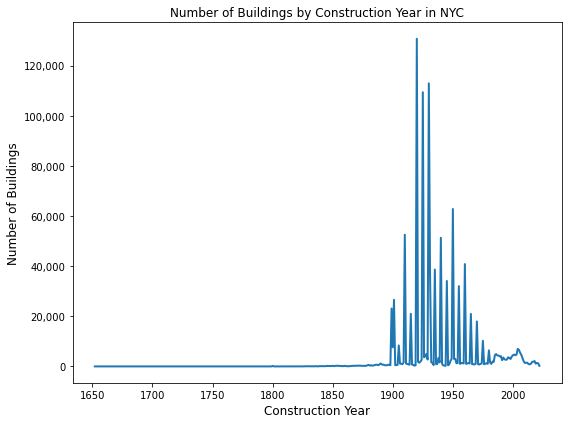

In [67]:
fig, ax = plt.subplots(figsize=(8,6))

# plotting line chart of number of buildings by 'CNSTRCT_YR'
ax.plot(g['count'], linewidth=2)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

In [68]:
# previewing number of buildings constructed after 1900
g.loc[g.index >= 1900].head()

,count
CNSTRCT_YR,
1900,7630
1901,26592
1902,502
1903,529
1904,579


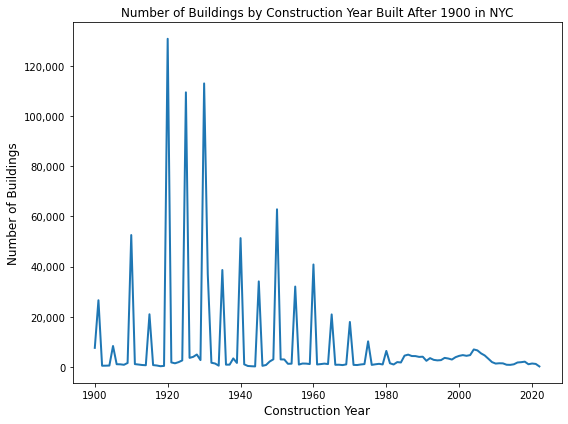

In [69]:
fig, ax = plt.subplots(figsize=(8,6))

# plotting line chart of number of buildings by 'CNSTRCT_YR' built after 1900
ax.plot(g.loc[g.index >= 1900], linewidth=2)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Number of Buildings by Construction Year Built After 1900 in NYC', fontsize=12)

plt.tight_layout()

In [70]:
# previewing first five rows
g.head()

,count
CNSTRCT_YR,
1652,1
1661,2
1680,1
1690,1
1694,1


In [71]:
# calculating the cumulative sum of buildings by 'CNSTRCT_YR'
g['cumsum'] = g['count'].cumsum()

# previewing first five rows
g.head()

,count,cumsum
CNSTRCT_YR,,
1652,1,1
1661,2,3
1680,1,4
1690,1,5
1694,1,6


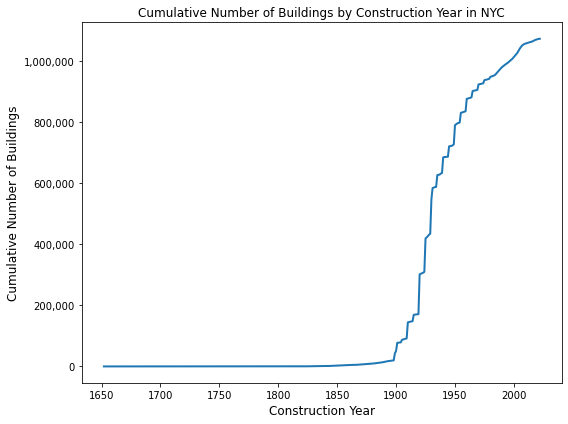

In [72]:
fig, ax = plt.subplots(figsize=(8,6))

# plotting line chart of cumulative number of buildings by 'CNSTRCT_YR'
ax.plot(g['cumsum'], linewidth=2)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Cumulative Number of Buildings', fontsize=12)
plt.title('Cumulative Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

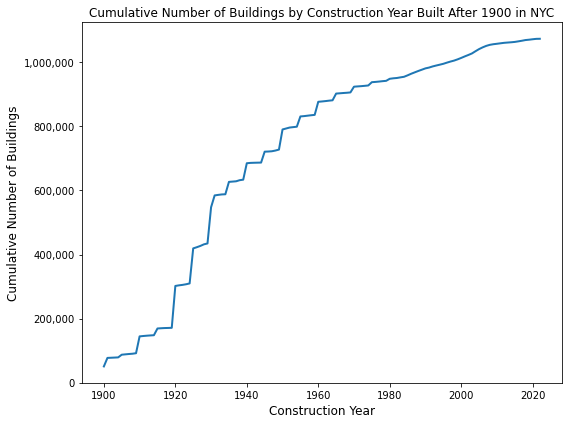

In [73]:
fig, ax = plt.subplots(figsize=(8,6))

# plotting line chart of cumulative number of buildings by 'CNSTRCT_YR' built after 1900
ax.plot(g[g.index >= 1900]['cumsum'], linewidth=2)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Cumulative Number of Buildings', fontsize=12)
plt.title('Cumulative Number of Buildings by Construction Year Built After 1900 in NYC', fontsize=12)

plt.tight_layout()

## 5.2 Attempting to Identify the Oldest Building in the Dataset

In [74]:
# sorting by the 'CNSTRCT_YR' in ascending order and 
# dropping records that don't have a building name (i.e. NAME)

building_df.sort_values(by='CNSTRCT_YR').dropna(subset=['NAME']).head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1044341,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100.0,14.0,0,0,3.079170e+09,3.079170e+09,Photogramm
776301,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.12,2100.0,64.0,0,0,4.050130e+09,4.050130e+09,Photogramm
57665,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.64,2100.0,38.0,0,0,5.078570e+09,5.078570e+09,Photogramm
570083,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.26,2100.0,21.0,0,0,5.028300e+09,5.028300e+09,Photogramm
550647,MULTIPOLYGON (((-74.01121069434295 40.70334382...,Fraunces Tavern,1078965,1719.0,01/28/2020 12:00:00 AM,Constructed,299639,47.83,2100.0,7.0,0,0,1.000070e+09,1.000070e+09,Photogramm


In [75]:
# identifying the oldest building with a building name in this dataset and
oldest = building_df.sort_values(by='CNSTRCT_YR').dropna(subset=['NAME']).head(1)

oldest

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1044341,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100.0,14.0,0,0,3.079170e+09,3.079170e+09,Photogramm


### We will use the Pieter Claesen Wyckoff House as the oldest building in this dataset

**Screenshot of Pieter Claesen Wyckoff House from Wikipedia:**

https://en.wikipedia.org/wiki/Wyckoff_House

![Pieter-Claesen-Wyckoff-House](images/Pieter-Claesen-Wyckoff-House.png)

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace incorrect values with the median, and detect outliers with box plots. This step is crucial if you are interested in modeling or predicting future values. In Part III, we will focus on data visualization.